## Predicting Energy demand based on temperature


We will be using the train_data and test_data to train and test an ML model.
- first section will be on batch data(batchlearning).
- Second section of this note book will using incremental learning method.

### Batchlearning
- This is using stored historical data to train an ML model
- This will be implemented us SKLearn and Keras


Importing the necessary libraries

In [1]:
# Importing Libraies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.callbacks import Callback

Data Preprocessing
- data ingestion
- exploratory analysis
- cleaning

In [2]:
#Data Ingestion
training_set=pd.read_csv('train_data.csv',index_col=[0])
# checking if data was loaded correctly
training_set.head()

,temperature,demand
0,37.212162,164.733179
1,40.679730,689.095128
2,43.404054,682.134571
3,24.763514,703.016241
4,26.962162,686.774942


In [3]:
# getting some info about our data
print(training_set.describe()) # general statistics
print(training_set.dtypes) # data type
print(training_set.isnull()) #checking for missing data points

       temperature       demand
count   260.000000   260.000000
mean     51.353935   768.367678
std      15.242134   126.565154
min      12.260811   161.252900
25%      39.035811   699.342614
50%      53.155405   804.524362
75%      64.799324   849.284609
max      76.514865  1000.000000
temperature    float64
demand         float64
dtype: object
     temperature  demand
0          False   False
1          False   False
2          False   False
3          False   False
4          False   False
..           ...     ...
255        False   False
256        False   False
257        False   False
258        False   False
259        False   False

[260 rows x 2 columns]


array([[<AxesSubplot:title={'center':'temperature'}>,
        <AxesSubplot:title={'center':'demand'}>]], dtype=object)

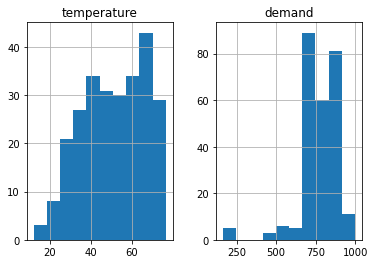

In [4]:
# Data distribution with histogram plot
training_set.hist()

<AxesSubplot:>

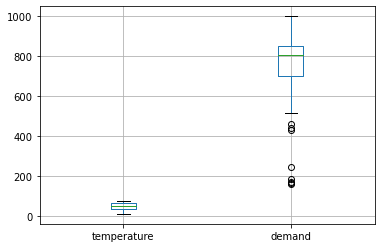

In [5]:
# We do not have a normal distribution,we will investigate outliers with a boxplot.
# Visualizing training data for outlier
training_set.boxplot()

array([[<AxesSubplot:xlabel='temperature', ylabel='temperature'>,
        <AxesSubplot:xlabel='demand', ylabel='temperature'>],
       [<AxesSubplot:xlabel='temperature', ylabel='demand'>,
        <AxesSubplot:xlabel='demand', ylabel='demand'>]], dtype=object)

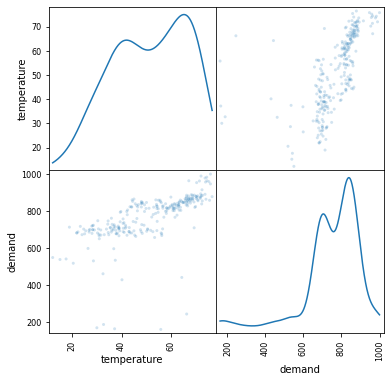

In [6]:
#Exploring feature relationship
from pandas.plotting import scatter_matrix
scatter_matrix(training_set, alpha=0.2, figsize=(6, 6), diagonal='kde')

After our exploratory analysis,we found the follow information:
- we had no missing data
- our data distribution was skewed
- our data had some outliers
- our data had a linear relationship
the only data cleaning step is taking care of the outliers

<AxesSubplot:>

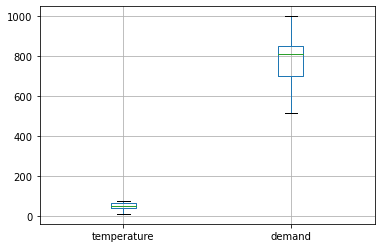

In [7]:
# data cleaning
#We use the Turkey rule to detect outlier
Q1=training_set['demand'].quantile(0.25)
Q3=training_set['demand'].quantile(0.75)
IQR=Q3-Q1
lower_lim=Q1-1.5*IQR
upper_lim=Q3+1.5*IQR
# using the above condition to drop outliers
filtered_data=training_set[training_set['demand'] >= lower_lim]

#doing a boxplot to visualize if the outliers are filtered out
filtered_data.boxplot()

In [8]:
# Processing our data set
# Seperating features from targets variables[x is the feature and y is the dependent variable(target)]
X=filtered_data.iloc[:,:-1].values
y=filtered_data.iloc[:,1:2].values
# Splitting Data
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.10, random_state=0)
#Scaling our data by using StandardScalar(to have a uniform scale)
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

SVM model

In [9]:
# Create linear regression object
regr_svm = svm.SVR(kernel='linear')
# Train the model using the training sets
regr_svm.fit(x_train, y_train)

C:\Users\gjera\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [10]:
#Checking parameters of my nodel
#regr_svm.get_params()
#Giving that this is a simple model for illustration,we will not do any hyper_parameters tunning


    Evaluating our model

In [11]:
# Make predictions using the testing set
y_pred = regr_svm.predict(x_test)
# The coefficients
print("Coefficients: \n", regr_svm.coef_)
# The mean squared error
print("mae: %.2f" %  mean_absolute_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test,y_pred))


Coefficients: 
 [[59.40744115]]
mae: 47.02
Coefficient of determination: 0.58


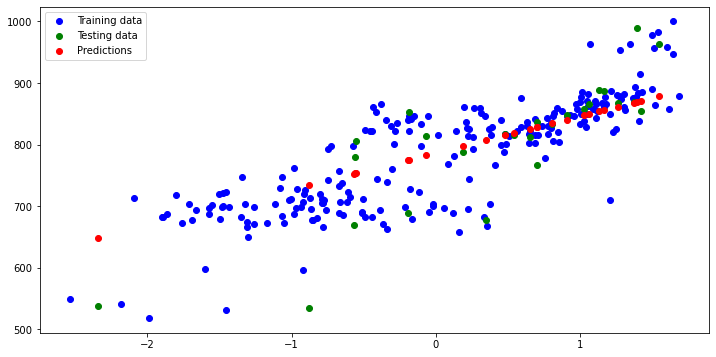

In [12]:
#Plotting the result
def plot_preds(traindata = x_train,
               trainlabels = y_train,
               testdata =x_test,
               testlabels = y_test,
               predictions =y_pred):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()
plot_preds(traindata =x_train,

           trainlabels = y_train,

           testdata = x_test,

           testlabels = y_test,

           predictions = y_pred)

DNN_Regression

In [13]:
# Building the DNN
model= tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
#Compiling the Model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae'])
# training the model
model.fit(x_train, y_train, epochs=500, verbose=0)

In [14]:
#evaluating the model
y_pred=model.predict(x_test)
model.evaluate(x_test,y_test)
#This model can be optmized using KerasTuner

1/1 [==============================] - 1s 835ms/step - loss: 47.4313 - mae: 47.4313


[47.431339263916016, 47.431339263916016]

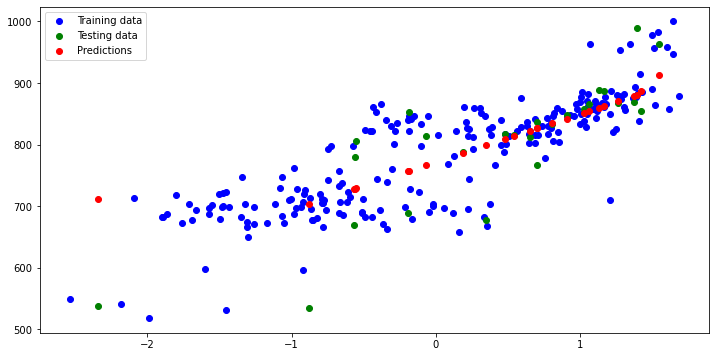

In [15]:
#Plotting the result
def plot_preds(traindata = x_train,
               trainlabels = y_train,
               testdata =x_test,
               testlabels = y_test,
               predictions =y_pred):
  plt.figure(figsize=(12,6))
  plt.scatter(traindata, trainlabels, c="b", label="Training data")
  plt.scatter(testdata, testlabels, c="g", label="Testing data")
  plt.scatter(testdata, predictions, c="r", label="Predictions")
  plt.legend()
plot_preds(traindata =x_train,

           trainlabels = y_train,

           testdata = x_test,

           testlabels = y_test,

           predictions = y_pred)

## Incremental learning 
- evolving learning from data stream.
- this algorithm process one sample data at a time.
- its good when data is not avialable at ones,it is continously being generated.

Incremental learning method will be implemented using AdaptiveRandomForestRegressor algorithm from the skmultiflow library.This algorithm also adapts to drift and uses the ADWIN algorithm to detect concept drift and also an alerting system.

In [16]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from skmultiflow.data import FileStream
from skmultiflow.meta import AdaptiveRandomForestRegressor

Creating streaming data

In [17]:
#Setup a data  Stream
stream = FileStream('train_data.csv')
#Prepare Stream for use
stream.prepare_for_use()

C:\Users\gjera\anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


In [18]:
# Setup the Adaptive Random Forest regressor
arf_reg =AdaptiveRandomForestRegressor()

In [19]:
# Auxiliary variables to control loop and track performance
n_samples = 0
max_samples =260
y_pred = np.zeros(max_samples)
y_true = np.zeros(max_samples)
# Run test-then-train loop for max_samples and while there is data
while n_samples < max_samples and stream.has_more_samples():
    X, y = stream.next_sample()
    y_true[n_samples] = y[0]
    y_pred[n_samples] = arf_reg.predict(X)[0]
    arf_reg.partial_fit(X, y)
    n_samples += 1
# Display results
print('Adaptive Random Forest regressor example')
print('{} samples analyzed.'.format(n_samples))
print('Mean absolute error: {}'.format(np.mean(np.abs(y_true - y_pred))))

Adaptive Random Forest regressor example
260 samples analyzed.
Mean absolute error: 57.50267125420227


## Using the test data to test the algorithms

In [20]:
#Data Ingestion
testd=pd.read_csv('test_data.csv',index_col=[0])
# checking if data was loaded correctly
testd.head()

,temperature,demand
18,29.768919,703.963666
193,57.886486,818.331957
183,58.300000,819.570603
137,71.275676,959.124690
40,26.424324,689.925681


In [21]:
# Processing our data set
# Seperating features from targets variables[x is the feature and y is the dependent variable(target)]
x=testd.iloc[:,:-1].values
y=testd.iloc[:,1:2].values
#Preprocessing the data
x=sc.transform(x) #using standard scalar as it was for training

In [22]:
# Prediction on test data with SVm
y_pred_svm=regr_svm.predict(x)
#print(y_pred_svm)
# The mean squared error
print("mae: %.2f" %  mean_absolute_error(y, y_pred_svm))

mae: 75.28


In [23]:
#Predictions on test data with DNNmodel
y_pred=model.predict(x)
print("mae: %.2f" %  mean_absolute_error(y, y_pred))
y_pred_DNN=np.squeeze(y_pred)# converting data to a list format
#print(y_pred_DNN)

mae: 71.83


In [24]:
#prediction
# import test data as stream
test_stream = FileStream('test_data.csv')
#Prepare Stream for use
stream.prepare_for_use()
X, y_true = test_stream.next_sample(100)
y_pred_arf=arf_reg.predict(X)
#print(y_pred)
print('AdaptiveRandomForestRegressor mean absolute error: {}'.
      format(np.mean(np.abs(y_true - y_pred_arf))))

AdaptiveRandomForestRegressor mean absolute error: 79.89823833756014


C:\Users\gjera\anaconda3\lib\site-packages\skmultiflow\data\base_stream.py:191: FutureWarning: 'prepare_for_use' has been deprecated in v0.5.0 and will be removed in v0.7.0.
New instances of the Stream class are now ready to use after instantiation.
  warnings.warn(


In [25]:
#creating a dictionary of my grown truth and predicted value
dict={'y_true':y_true,'y_pred_svm':y_pred_svm,'y_pred_DNN':y_pred_DNN,'y_pred_arf':y_pred_arf}
#creating a data frame 
df = pd.DataFrame(dict) 
df.head(10) 

,y_true,y_pred_svm,y_pred_DNN,y_pred_arf
0,703.963666,704.552125,677.808533,833.005604
1,818.331957,814.165648,807.765503,861.365960
2,819.570603,815.777689,809.875793,868.231422
3,959.124690,866.362062,876.211792,918.083254
4,689.925681,691.513558,685.105713,726.028319
5,225.846408,747.819096,720.913025,674.881629
6,669.694467,738.858044,709.182373,847.639765
7,1000.000000,859.329137,866.887756,936.974056
8,766.308836,724.497182,690.382996,627.366873
9,925.268373,841.391230,843.405762,903.323716


<AxesSubplot:>

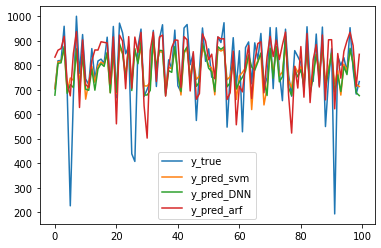

In [26]:
 #Comparing grown truth with the predictions of the different algorithm
df.plot.line()